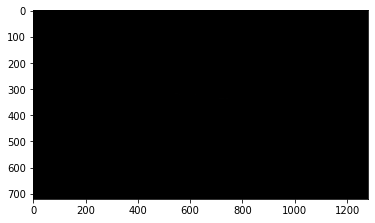

In [176]:
import os
images = os.listdir('left/xmen_apocalypse')
#images2 = os.listdir('left/skyscraper')
import numpy as np
import matplotlib.pyplot as plt
import cv2

imageL = cv2.imread('left/xmen_apocalypse/'+images[193000])
#imageR = cv2.imread('left/skyscraper/'+images2[50000])

plt.imshow(imageL)
plt.show()
#plt.imshow(imageR)
#plt.show()

In [91]:
imgRBW = cv2.cvtColor(imageR, cv2.COLOR_BGR2GRAY)
imgLBW = cv2.cvtColor(imageL, cv2.COLOR_BGR2GRAY)

stereo = cv2.StereoSGBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgRBW,imgLBW)

plt.imshow(disparity,'gray')
plt.show()

NameError: name 'imageR' is not defined

In [17]:
import os
os.listdir('left/')

['skyscraper', '.ipynb_checkpoints', '47Ronin', 'Dredd', 'Prometheus']